In [1]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



### **Visualizacion de Datos**

### **M0**

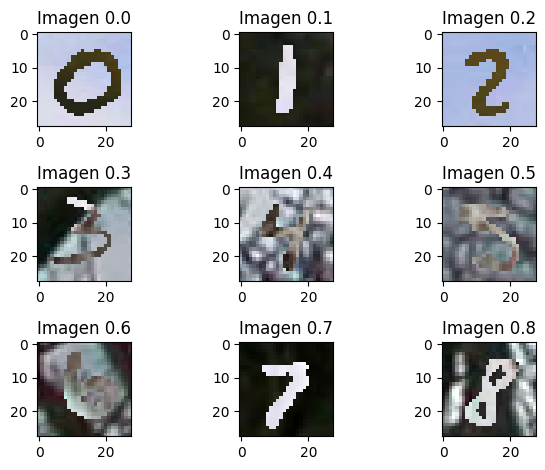

In [7]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m0/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M1**

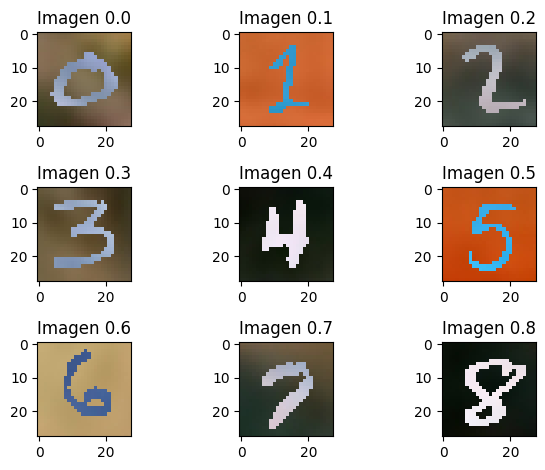

In [8]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m1/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M2**

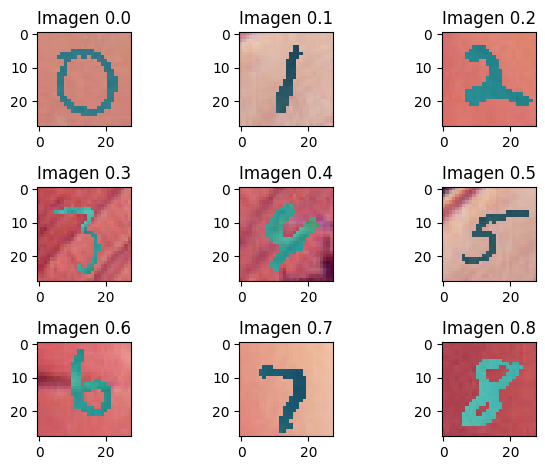

In [9]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m2/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **Divison Testing y Train**

In [ ]:
"""
import os
import shutil

origen_train = "./MMNIST/test"
destino_train = "./MMNIST_reorganizado/test"

# Crear carpetas destino 0–9
for i in range(10):
    os.makedirs(os.path.join(destino_train, str(i)), exist_ok=True)

# Recorre m0, m1, m2
for carpeta_estilo in os.listdir(origen_train):
    ruta_estilo = os.path.join(origen_train, carpeta_estilo)
    if os.path.isdir(ruta_estilo):
        for archivo in os.listdir(ruta_estilo):
            if archivo.endswith(".png"):
                try:
                    # Extraer la clase desde el nombre: parte después del punto
                    clase = int(archivo.split(".")[1])  # ej: "2.7.png" → clase = 7
                    origen = os.path.join(ruta_estilo, archivo)
                    destino = os.path.join(destino_train, str(clase), f"{carpeta_estilo}_{archivo}")
                    shutil.copy(origen, destino)
                except (IndexError, ValueError):
                    print(f"Nombre inválido: {archivo}")
"""

### **Cargar Imagenes por lote**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
)


test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    './MMNIST_reorganizado/train',     
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
    shuffle=True,  
)

test_generator = test_datagen.flow_from_directory(
    './MMNIST_reorganizado/test',      
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
)



Found 180000 images belonging to 10 classes.
Found 30000 images belonging to 10 classes.


In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

history = model.fit(
    train_generator,
    epochs=10,                   
    validation_data=test_generator
)


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1644s 1s/step - accuracy: 0.6709 - loss: 0.9973 - val_accuracy: 0.9403 - val_loss: 0.1888
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.8960 - loss: 0.3359 - val_accuracy: 0.9554 - val_loss: 0.1381
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 138s 98ms/step - accuracy: 0.9267 - loss: 0.2361 - val_accuracy: 0.9550 - val_loss: 0.1467
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 143s 102ms/step - accuracy: 0.9408 - loss: 0.1904 - val_accuracy: 0.9642 - val_loss: 0.1156
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 139s 99ms/step - accuracy: 0.9509 - loss: 0.1596 - val_accuracy: 0.9699 - val_loss: 0.0951
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 140s 99ms/step - accuracy: 0.9554 - loss: 0.1437 - val_accuracy: 0.9733 - val_loss: 0.0875
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.9608 - loss: 0.1260 - val_accuracy: 0.9710 - val_loss: 0.0985
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 129s 92ms/step - accuracy:

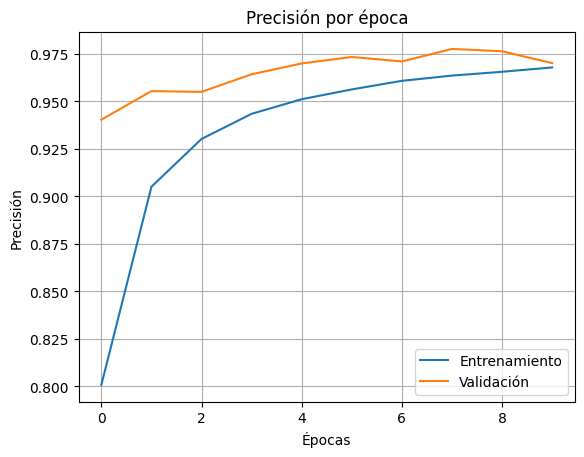

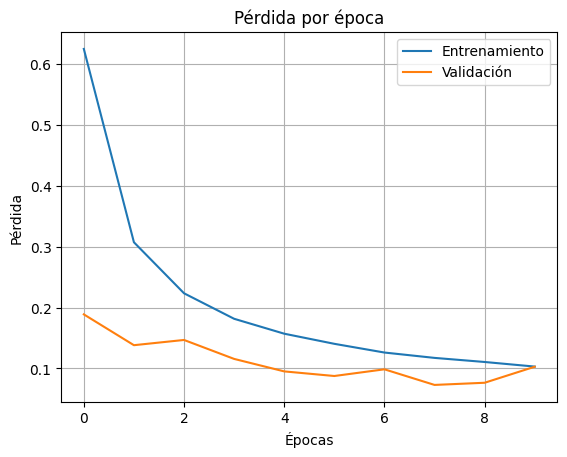

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
model.save("modelos/modeloCNN.keras")

In [9]:
print(train_generator.class_indices)  # Ver nombres
print(train_generator.classes[:20])   # Ver primeras etiquetas


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Obtener predicciones del modelo
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtener etiquetas verdaderas
y_true = test_generator.classes

# Mostrar métricas por clase
print("Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step
Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      2940
           1       0.11      0.10      0.11      3405
           2       0.10      0.10      0.10      3096
           3       0.10      0.11      0.11      3030
           4       0.09      0.09      0.09      2946
           5       0.08      0.08      0.08      2676
           6       0.09      0.09      0.09      2874
           7       0.10      0.10      0.10      3084
           8       0.09      0.09      0.09      2922
           9       0.09      0.09      0.09      3027

    accuracy                           0.10     30000
   macro avg       0.10      0.10      0.10     30000
weighted avg       0.10      0.10      0.10     30000

Matriz de confusión:
[[299 295 331 304 274 284 260 303 304 286]
 [346 347 362 345 321 313 328 345 346 352]
 [299 331 309 347 325 240 293 275 371 306]
 [275 332 296 332 304 